# Data Science 100 Group 008-05 Project Proposal

#### Zack Peachell, Jasper Palov, Arjun Saxena, Bhavya Dubey

\
\

## Introduction to our project: 

## Preliminary exploratory data analysis:
\
from the dataset we have chosen!

In [11]:
# Run this cell to continue.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [ ]:
star_raw_data <-url("https://www.kaggle.com/datasets/deepu1109/star-dataset")


In [58]:


read_star <- read_csv("DATA/6 class csv.csv")

#these columns need renames

name_star <- read_star|>
                rename("Star_type" = "Star type")|>
                rename("Temperature_K" = "Temperature (K)")|>
                rename("Star_color" = "Star color")|>
                rename("Spectral_Class" = "Spectral Class")|>
                rename("Luminosity_ratio" = "Luminosity(L/Lo)")|>
                rename("Radius_ratio" = "Radius(R/Ro)")|>
                rename("Absolute_magnitude_Mv" = "Absolute magnitude(Mv)")|>
                filter(Spectral_Class != "NA")
name_star

set.seed(2023) #check this I think you need a specific seed

split_star <- initial_split(name_star, prop = 0.75, strata = Star_type)
train_star <- training(split_star)
test_star <- testing(split_star)
train_star

Rows: 240 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Star color, Spectral Class
dbl (5): Temperature (K), Luminosity(L/Lo), Radius(R/Ro), Absolute magnitude...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Temperature_K,Luminosity_ratio,Radius_ratio,Absolute_magnitude_Mv,Star_type,Star_color,Spectral_Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3068,0.0024,0.1700,16.12,0,Red,M
3042,0.0005,0.1542,16.60,0,Red,M
2600,0.0003,0.1020,18.70,0,Red,M
⋮,⋮,⋮,⋮,⋮,⋮,⋮
8829,537493,1423,-10.73,5,White,A
9235,404940,1112,-11.23,5,White,A
37882,294903,1783,-7.80,5,Blue,O


Temperature_K,Luminosity_ratio,Radius_ratio,Absolute_magnitude_Mv,Star_type,Star_color,Spectral_Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2600,0.000300,0.102,18.70,0,Red,M
2800,0.000200,0.160,16.65,0,Red,M
1939,0.000138,0.103,20.06,0,Red,M
⋮,⋮,⋮,⋮,⋮,⋮,⋮
8829,537493,1423,-10.73,5,White,A
9235,404940,1112,-11.23,5,White,A
37882,294903,1783,-7.80,5,Blue,O


We can see that this data is very tidy as it follows the criteria for tidy data, no overlapping variables, a single observtaion per cell, and most importantly is easily readable. The only item we had to address was renaming the columns as were spaces between words making it difficult for the program to read it. Now, we should attempt to see how many of each spectral class we have, to see how many of each star we have.

In [59]:
#analyzing our training data
star_counted <- train_star|>
                group_by(Spectral_Class)|>
                summarize(count = n())
star_counted

Spectral_Class,count
<chr>,<int>
A,15
B,34
F,14
K,4
M,82
O,31


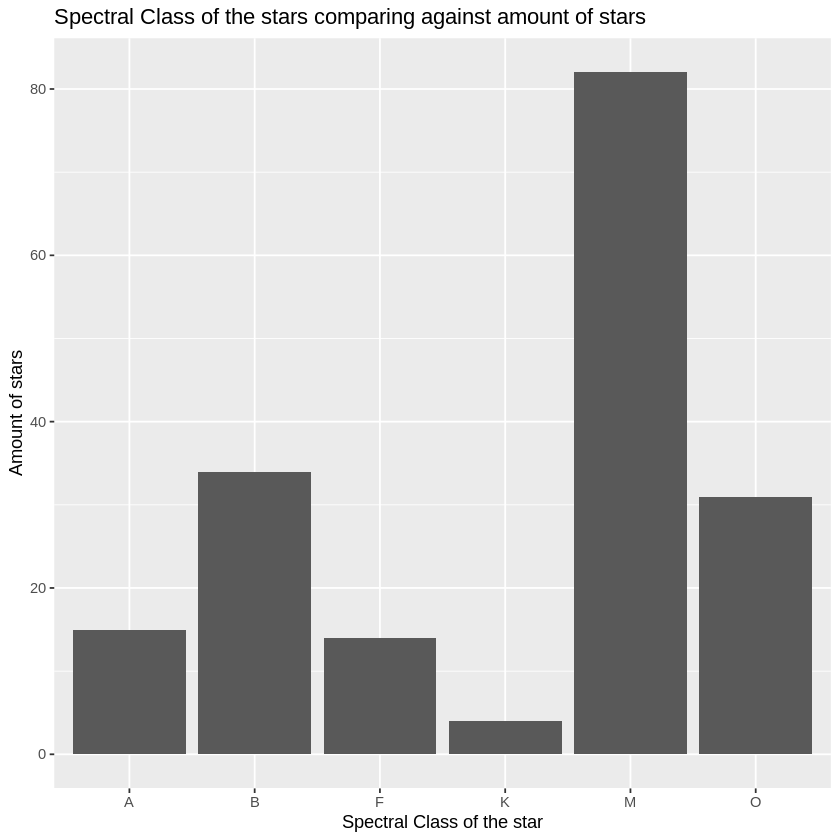

In [60]:
options(repr.width.plot = 10, repr.height.plot = 10)

star_plot <- star_counted |>
                ggplot(aes(x = Spectral_Class, y = count))+
                geom_bar(stat = "identity")+
                xlab("Spectral Class of the star")+
                ylab("Amount of stars")+
                ggtitle("Spectral Class of the stars comparing against amount of stars")
star_plot

This plot was useful to determine how much of a spectral class we have, and we see an overwhelming amount of M class stars, which will play an important factor in our classification model. For a classfication problem we should determine a predictor centered graph to see what values look like, with scaled data of course. We will compare temperature and luminosity ratio!

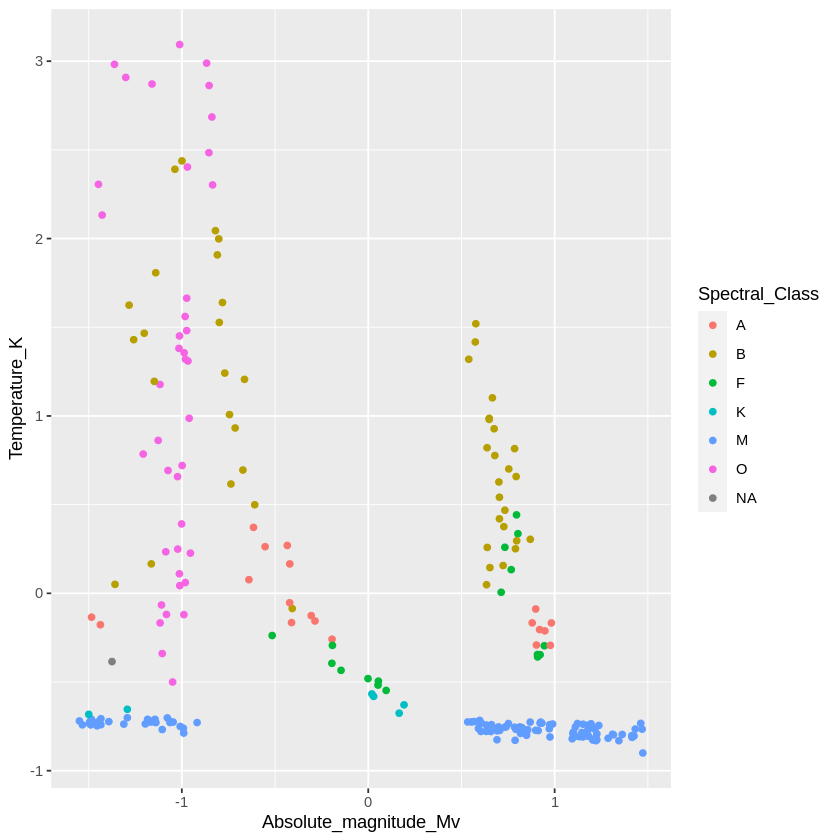

In [61]:
star_recipe <- recipe(Spectral_Class ~ Temperature_K + Luminosity_ratio + Radius_ratio + Absolute_magnitude_Mv, data = train_star)|>
                    step_scale(all_predictors())|>
                    step_center(all_predictors())|>
                    prep()
star_scale <- bake(star_recipe, name_star)               
star_recipe_plot <- star_scale|>
                    ggplot(aes(x = Absolute_magnitude_Mv, y = Temperature_K))+
                    geom_point(aes(colour = Spectral_Class))
star_recipe_plot

Well this graph is interesting to say the least, and no real trend is spotted between the points, but we do see a grouping of the different spectral classes that begins to emerge with our scaled data. This inidcates that we will need to use all variables during a classification based problem. Stopped here wednesday, need to remove the NA point.

## Methods

## Expected outcomes and significance